DOWNLOAD IMAGES

In [1]:
import os
import json
import requests
import shutil
import numpy as np
import pandas as pd

import json

from PIL import Image, ImageDraw
from pathlib import Path


In [2]:
INPUT_DIR = Path('/kaggle/input/fathomnet-out-of-sample-detection')
OUTPUT_DIR_RAW = Path('/kaggle/working/raw')
OUTPUT_DIR = Path('/kaggle/working/dataset')
TRAIN_IMGS_DIR = OUTPUT_DIR / 'imgs' / 'train'
TRAIN_LABELS_DIR = OUTPUT_DIR / 'labels' / 'train'
VAL_IMGS_DIR = OUTPUT_DIR / 'imgs'/ 'val'
VAL_LABELS_DIR = OUTPUT_DIR / 'labels' / 'val'
TEST_IMGS_DIR = OUTPUT_DIR / 'imgs' / 'test'


RANDOM_STATE = 42
SAMPLE_SIZE = 1.0


In [6]:
def read_json(filename):
    return json.load(open(filename, "r"))

def read_csv(filename):
    return pd.read_csv(filename).set_index('id')

def download_image(image):
    if not os.path.exists(image[0]):
        resp = requests.get(image[1], stream=True)
        resp.raw.decode_content = True
        with open(image[0], 'wb') as f:
            shutil.copyfileobj(resp.raw, f)
    

In [ ]:
# from multiprocessing.pool import ThreadPool

# def delete_empty_files(folder_path):
#     for file_name in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, file_name)
#         if os.path.isfile(file_path) and os.path.getsize(file_path) == 0:
#             os.remove(file_path)

# def download(split, data_json):
#     delete_empty_files(f"/kaggle/working/raw/{split}/")
#     train_imgs = [
#         [f"/kaggle/working/raw/{split}/" + i["file_name"], i["coco_url"]]
#         for i in train_json["images"]
#         if not os.path.exists(f"/kaggle/working/raw/{split}/"+i["file_name"])
#     ]
#     pool = ThreadPool(10000)
#     results = pool.map(download_image, train_imgs)
#     pool.close()
#     pool.join()

In [7]:
train_json = read_json(INPUT_DIR / "object_detection/train.json")

In [ ]:
# download('train', train_json)

In [ ]:
# eval_json = read_json(INPUT_DIR / "object_detection/eval.json")
# download('eval', eval_json)

EXPLORE

In [8]:
def get_annotations(json_data):
    df = pd.json_normalize(json_data['annotations'])
    return df.set_index('id')

def get_image_data(json_data):
    df = pd.json_normalize(json_data['images'])
    return df.set_index('id')

In [9]:
annotation_data = get_annotations(train_json)
display(annotation_data)


,image_id,category_id,segmentation,area,bbox,iscrowd
id,,,,,,
1,1,1.0,[],7869.0,"[347.0, 188.0, 129.0, 61.0]",0
2,2,1.0,[],8775.0,"[346.0, 191.0, 135.0, 65.0]",0
3,3,1.0,[],8768.0,"[343.0, 192.0, 137.0, 64.0]",0
4,4,88.0,[],315.0,"[623.0, 95.0, 21.0, 15.0]",0
5,4,1.0,[],440.0,"[361.0, 175.0, 22.0, 20.0]",0
...,...,...,...,...,...,...
23700,5948,283.0,[],4360.0,"[698.0, 544.0, 40.0, 109.0]",0
23701,5949,286.0,[],3792.0,"[532.0, 440.0, 48.0, 79.0]",0
23702,5949,286.0,[],3484.0,"[609.0, 426.0, 52.0, 67.0]",0


In [ ]:
# annotation_data.to_csv('/kaggle/working/annotation_data.csv', index = False)

In [11]:
def draw_rectangle(image, xy, color='red'):
    img = ImageDraw.Draw(image) 
    img.rectangle(xy, outline=color, width=3)
    return image

In [10]:
train_image_data = get_image_data(train_json)
display(train_image_data)

,width,height,file_name,license,flickr_url,coco_url,date_captured
id,,,,,,,
1,720,368,3b6f01ae-5bde-434d-9b06-79b269421ed6.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:34
2,720,368,dce21f7c-20e5-482b-bd90-c038f8464c03.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:38
3,720,368,4a7f2199-772d-486d-b8e2-b651246316b5.png,0,https://fathomnet.org/static/m3/framegrabs/Tib...,https://fathomnet.org/static/m3/framegrabs/Tib...,2007-08-17 17:50:44
4,720,368,3bddedf6-4ff8-4e81-876a-564d2b03b364.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-28 17:54:14
5,720,369,3f735021-f5de-4168-b139-74bf2859d12a.png,0,https://fathomnet.org/static/m3/framegrabs/Ven...,https://fathomnet.org/static/m3/framegrabs/Ven...,2007-08-28 19:00:00
...,...,...,...,...,...,...,...
5946,720,366,701715fe-b278-4310-ac1d-cca8ddacc830.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,2011-06-05 18:07:34
5947,1920,1079,45e73fdd-d8a2-4ee1-abc7-3e34d2dfa82a.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,2011-06-05 18:22:23
5948,1920,1080,676b982a-deeb-46ee-b47d-8a97a1b0c76c.png,0,https://fathomnet.org/static/m3/framegrabs/Doc...,https://fathomnet.org/static/m3/framegrabs/Doc...,2015-09-17 14:17:29


In [14]:
def get_image_by_id(data, image_id):
    filename = data.loc[image_id]['file_name']
    return Image.open(TRAIN_IMGS_DIR / filename)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))

image_ids = train_image_data.sample(n=16).index
for image_id, ax in zip(image_ids, axes.flatten()):
    
    # Load image
    image = get_image_by_id(train_image_data, image_id)

    # Get box coordinates
    bboxes = annotation_data[annotation_data['image_id'] == image_id]['bbox'].values

    # Draw boxes
    for coor in bboxes:
        (x1, y1), (x2, y2) = (coor[0], coor[1]), (coor[0] + coor[2], coor[1] + coor[3])
        draw_rectangle(image, xy=((x1, y1), (x2, y2)))
    
    ax.imshow(image)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
    
fig.tight_layout()
plt.show()

YOLO DATASET

In [27]:
category_data = read_csv(INPUT_DIR / 'category_key.csv')

In [ ]:
from tqdm.notebook import tqdm

def create_bboxes(annotation_data):
    df = annotation_data.copy()
#     df['bbox'] = df['bbox'].apply(lambda x: ast.literal_eval(x))

    groupby_image = df.groupby(by='image_id')
    df = groupby_image['bbox'].apply(list).reset_index(name='bboxes').set_index('image_id')
    df['category_ids'] = groupby_image['category_id'].apply(list)  
    return df

def create_yolo_dataset(
    image_data,
    annotation_data,
    data_type='train'
):
    bboxes_data = create_bboxes(annotation_data)
    image_ids = image_data.index
    
    for image_id in tqdm(image_ids, total=len(image_ids)):
        image_row = image_data.loc[image_id]
        image_width = image_row['width']
        image_height = image_row['height']
        file_name = Path(image_row['file_name']).with_suffix('.jpg')
        source_image_path = OUTPUT_DIR_RAW / 'train' / image_row['file_name']
        target_image_path = OUTPUT_DIR / f'imgs/{data_type}/{file_name}'
        
        if not os.path.exists(source_image_path):
            continue
        bounding_bboxes = bboxes_data['bboxes'].loc[image_id]
        category_ids = bboxes_data['category_ids'].loc[image_id]

     
     
        label_path = (OUTPUT_DIR / f'labels/{data_type}/{file_name}').with_suffix('.txt')
        
        print(file_name)
        
        yolo_data = []
        for bbox, category in zip(bounding_bboxes, category_ids):
            x = bbox[0]
            y = bbox[1]
            w = bbox[2]
            h = bbox[3]
            x_center = x + w/2
            y_center = y + h/2
            x_center /= image_width
            y_center /= image_height
            w /= image_width
            h /= image_height
            
            yolo_data.append([category, x_center, y_center, w, h])

        yolo_data = np.array(yolo_data)

        # YOLO label file
        np.savetxt(label_path, yolo_data, fmt=["%d", "%f", "%f", "%f", "%f"])

        # Image file
        shutil.copy(source_image_path, target_image_path)

In [ ]:
from sklearn.model_selection import train_test_split

TEST_SIZE = .2

data = train_image_data.sample(frac=SAMPLE_SIZE, random_state=RANDOM_STATE)
X_train, X_val = train_test_split(
    data, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE)

In [ ]:
create_yolo_dataset(X_train, annotation_data, data_type='train')

In [ ]:
create_yolo_dataset(X_val, annotation_data, data_type='val')

In [14]:
%%writefile dataset.yaml
path: ../dataset
train: images/train
val: images/val
test: images/test

# Classes
names:
    0: Actiniaria
    1: Actinernus
    2: Actiniidae
    3: Actinoscyphia
    4: Bolocera
    5: Dofleinia
    6: Hormathiidae
    7: Isosicyonis
    8: Liponema brevicorne
    9: Metridium farcimen
    10: Actinopterygii
    11: Agonidae
    12: Albatrossia pectoralis
    13: Alepocephalus tenebrosus
    14: Anarrhichthys ocellatus
    15: Anoplopoma fimbria
    16: Antimora microlepis
    17: Bathypterois
    18: Bathysaurus mollis
    19: Careproctus
    20: Careproctus kamikawai
    21: Careproctus melanurus
    22: Careproctus ovigerus
    23: Cataetyx
    24: Chaunacops coloratus
    25: Chilara taylori
    26: Coryphaenoides
    27: Gobiidae
    28: Icelinus
    29: Icelinus filamentosus
    30: Lepidion
    31: Liparidae
    32: Lophiiformes
    33: Luciobrotula
    34: Lumpenus sagitta
    35: Macrouridae
    36: Merluccius productus
    37: Moridae
    38: Myctophidae
    39: Nezumia liolepis
    40: Nezumia stelgidolepis
    41: Ophidiidae
    42: Ophiodon elongatus
    43: Paralepididae
    44: Paraliparis
    45: Plectobranchus evides
    46: Porichthys mimeticus
    47: Psychrolutes phrictus
    48: Psychrolutidae
    49: Scorpaeniformes
    50: Sebastes
    51: Sebastolobus
    52: Spectrunculus grandis
    53: Xeneretmus
    54: Zaniolepis frenata
    55: Zaniolepis latipinnis
    56: Anguilliformes
    57: Nettastoma parviceps
    58: Ophichthus frontalis
    59: Synaphobranchidae
    60: Eptatretus
    61: Bothrocara brunneum
    62: Eucryphycus californicus
    63: Lycenchelys
    64: Lycenchelys crotalinus
    65: Lycodapus
    66: Lycodes
    67: Lycodes brevipes
    68: Lycodes cortezianus
    69: Lycodes diapterus
    70: Lycodes pacificus
    71: Pachycara bulbiceps
    72: Zoarcidae
    73: Aeolidiidae sp. 1
    74: Akoya platinum
    75: Bathybembix
    76: Bathydoris aioca
    77: Buccinidae
    78: Caenogastropoda
    79: Dendronotus patricki
    80: Gastropoda
    81: Neptunea-Buccinum Complex
    82: Nudibranchia
    83: Patellogastropoda
    84: Pleurobranchaea californica
    85: Tritonia tetraquetra
    86: Ziminella vrijenhoeki
    87: Asteroidea
    88: Asthenactis
    89: Astropecten
    90: Benthopecten
    91: Ceramaster
    92: Crossaster
    93: Dipsacaster eximius
    94: Dytaster gilberti
    95: Forcipulatida
    96: Goniasteridae
    97: Henricia
    98: Solasteridae
    99: Hippasteria
    100: Hymenaster
    101: Lophaster
    102: Luidia foliolata
    103: Mediaster
    104: Mediaster aequalis
    105: Mediaster tenellus
    106: Myxoderma
    107: Myxoderma platyacanthum
    108: Myxoderma sacculatum
    109: Patiria miniata
    110: Paulasterias mcclaini
    111: Paxillosida
    112: Peribolaster biserialis
    113: Poraniopsis
    114: Poraniopsis inflata
    115: Pterasteridae
    116: Pycnopodia helianthoides
    117: Pythonaster pacificus
    118: Rathbunaster californicus
    119: Stylasterias forreri
    120: Thrissacanthias penicillatus
    121: Valvatida
    122: Zoroasteridae
    123: Antedonidae
    124: Crinoidea
    125: Bathycrinidae
    126: Bathymetrinae
    127: Hyocrinidae
    128: Pentametrocrinus paucispinulus
    129: Abyssocucumis abyssorum
    130: Apostichopus
    131: Apostichopus californicus
    132: Apostichopus leukothele
    133: Benthodytes
    134: Benthothuria
    135: Elpidia
    136: Holothuria (Vaneyothuria) zacae
    137: Holothuroidea
    138: Laetmogone
    139: Oneirophanta mutabilis complex
    140: Paelopatides confundens
    141: Pannychia
    142: Peniagone
    143: Pseudostichopus mollis
    144: Psolidae
    145: Psolus squamatus
    146: Psychronaetes
    147: Psychropotes depressa
    148: Psychropotidae
    149: Scotoplanes
    150: Synallactes
    151: Aporocidaris milleri
    152: Brisaster
    153: Cystechinus giganteus
    154: Cystechinus loveni
    155: Cystocrepis setigera
    156: Echinoidea
    157: Echinocrepis rostrata
    158: Echinothuriidae
    159: Strongylocentrotus fragilis
    160: Tromikosoma
    161: Acanthascinae
    162: Bathydorus
    163: Bolosominae
    164: Caulophacus
    165: Chonelasma
    166: Corbitellinae
    167: Dictyocalyx
    168: Docosaccus maculatus
    169: Euplectellidae
    170: Farrea
    171: Farrea truncata complex
    172: Heterochone calyx
    173: Hexactinellida
    174: Hyalonema
    175: Hyalonema (Corynonema) populiferum
    176: Hyalonema (Oonema) bianchoratum
    177: Lyssacinosida sp. 1
    178: Regadrella
    179: Rossellidae
    180: Sclerothamnopsis
    181: Staurocalyptus
    182: Staurocalyptus solidus
    183: yellow ruffled sponge
    184: Calyptrophora
    185: Chrysogorgia
    186: Chrysogorgia monticola
    187: Chrysogorgia pinnata
    188: Iridogorgia
    189: Isidella
    190: Isidella tentaculum
    191: Isididae
    192: Keratoisis
    193: Lepidisis
    194: Parastenella
    195: Primnoidae
    196: Acanthogorgia
    197: Gorgoniidae
    198: Leptogorgia
    199: Plexauridae
    200: Swiftia
    201: Swiftia kofoidi
    202: Swiftia simplex
    203: Corallium
    204: Paragorgiidae
    205: Paragorgia arborea
    206: Alcyoniidae
    207: Bathyalcyon robustum
    208: Gersemia juliepackardae
    209: Heteropolypus
    210: Heteropolypus ritteri
    211: Clavularia
    212: Stolonifera
    213: Acanthoptilum
    214: Anthoptilum grandiflorum
    215: Anthoptilum lithophilum
    216: Distichoptilum gracile
    217: Funiculina
    218: Funiculina-Halipteris complex
    219: Halipteris californica
    220: Kophobelemnidae
    221: Pennatula
    222: Pennatula phosphorea
    223: Pennatulacea
    224: Protoptilum
    225: Ptilosarcus gurneyi
    226: Stylatula
    227: Umbellula
    228: Virgulariidae
    229: Desmophyllum dianthus
    230: Fungiacyathus (Bathyactis) marenzelleri
    231: Scleractinia
    232: Alternatipathes
    233: Antipatharia
    234: Heteropathes
    235: Lillipathes
    236: Parantipathes
    237: Schizopathidae
    238: Umbellapathes
    239: Brachyura
    240: Cancridae
    241: Chionoecetes tanneri
    242: Chorilia longipes
    243: Macroregonia macrochira
    244: Majidae
    245: Metacarcinus magister
    246: Lithodes couesi
    247: Lithodidae
    248: Neolithodes diomedeae
    249: Paralithodes rathbuni
    250: Paralomis
    251: Paralomis cf. papillata
    252: Paralomis multispina
    253: Paralomis verrilli
    254: Caridea
    255: Eualus macrophthalmus
    256: Pandalus
    257: Pandalus ampla
    258: Pandalus platyceros
    259: Pasiphaea
    260: Plesionika
    261: Calocarides quinqueseriatus
    262: Chirostylidae
    263: Galatheoidea
    264: Munida
    265: Munida bapensis
    266: Munida quadrispina
    267: Munidopsis
    268: Munidopsis depressa
    269: Munidopsis kensmithi
    270: Munidopsis lignaria
    271: Munidopsis recta
    272: Munidopsis scotti
    273: Pleuroncodes planipes
    274: Cirripedia
    275: Scalpellidae
    276: Verum proximum
    277: Pycnogonida
    278: Annelida
    279: Canalipalpata
    280: Echiura
    281: Harmothoe
    282: Hirudinea
    283: Paradiopatra
    284: Peinaleopolynoe orphanae
    285: Polychaeta
    286: Polynoidae
    287: Sabellidae
    288: Serpulidae
    289: Terebellidae

Overwriting dataset.yaml


In [ ]:
create_yolo_dataset(train_image_data, annotation_data, data_type='train')

YOLO-NAS MODEL

In [28]:
import yaml
from pprint import pprint

yml_file = open("/kaggle/working/dataset.yaml").read()

yml_dict = yaml.load(yml_file, yaml.SafeLoader)
classes = yml_dict['names']

pprint(classes)


{0: 'Actiniaria',
 1: 'Actinernus',
 2: 'Actiniidae',
 3: 'Actinoscyphia',
 4: 'Bolocera',
 5: 'Dofleinia',
 6: 'Hormathiidae',
 7: 'Isosicyonis',
 8: 'Liponema brevicorne',
 9: 'Metridium farcimen',
 10: 'Actinopterygii',
 11: 'Agonidae',
 12: 'Albatrossia pectoralis',
 13: 'Alepocephalus tenebrosus',
 14: 'Anarrhichthys ocellatus',
 15: 'Anoplopoma fimbria',
 16: 'Antimora microlepis',
 17: 'Bathypterois',
 18: 'Bathysaurus mollis',
 19: 'Careproctus',
 20: 'Careproctus kamikawai',
 21: 'Careproctus melanurus',
 22: 'Careproctus ovigerus',
 23: 'Cataetyx',
 24: 'Chaunacops coloratus',
 25: 'Chilara taylori',
 26: 'Coryphaenoides',
 27: 'Gobiidae',
 28: 'Icelinus',
 29: 'Icelinus filamentosus',
 30: 'Lepidion',
 31: 'Liparidae',
 32: 'Lophiiformes',
 33: 'Luciobrotula',
 34: 'Lumpenus sagitta',
 35: 'Macrouridae',
 36: 'Merluccius productus',
 37: 'Moridae',
 38: 'Myctophidae',
 39: 'Nezumia liolepis',
 40: 'Nezumia stelgidolepis',
 41: 'Ophidiidae',
 42: 'Ophiodon elongatus',
 43: 'P

YOLONAS

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
MODEL_ARCH = 'yolo_nas_s'
BATCH_SIZE = 8
MAX_EPOCHS = 20
CHECKPOINT_DIR = 'kaggle/working/checkpoints'
EXPERIMENT_NAME = 'fathomnet23'
CLASSES = sorted(classes.values())


In [ ]:
dataset_params = {
    'data_dir': '/kaggle/working/dataset',
    'train_images_dir':'/kaggle/working/dataset/imgs/train',
    'train_labels_dir':'/kaggle/working/dataset/labels/train',
    'val_images_dir':'/kaggle/working/dataset/imgs/val',
    'val_labels_dir':'/kaggle/working/dataset/labels/val',
    'test_images_dir':'/kaggle/working/dataset/imgs/test',
    'test_labels_dir':'/kaggle/working/dataset/labels/test',
    'classes': CLASSES
}

from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@20'
}

In [ ]:
!nvidia-smi

In [ ]:
torch.cuda.device_count()

In [ ]:
import torch
from super_gradients import init_trainer, Trainer
# from super_gradients.common import MultiGPUMode
# from super_gradients.training.utils.distributed_training_utils import setup_device
# from super_gradients.training.utils.distributed_training_utils import setup_gpu_mode
from super_gradients.training import models

# setup_device(multi_gpu=MultiGPUMode.DISTRIBUTED_DATA_PARALLEL, num_gpus=torch.cuda.device_count())

In [ ]:
model = models.get(
    MODEL_ARCH, 
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
).cuda()

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

trainer.train(
    model=model, 
    training_params=train_params, 
    train_loader=train_data, 
    valid_loader=val_data
)


In [29]:
%reload_ext tensorboard
%tensorboard --logdir {CHECKPOINT_DIR}/'Fathomnet23-Yolov8' --bind_all

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

In [ ]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/average_model.pth"
).to(DEVICE)

In [ ]:
YOLOV8

In [5]:
import torch
print(torch.__version__)

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.105 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4637.7/8062.4 GB disk)


In [6]:
yolo8 = YOLO('yolov8m.pt')

In [7]:
import wandb
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()

# I have saved my API token with "wandb_api" as Label. 
# If you use some other Label make sure to change the same below. 
wandb_api = user_secrets.get_secret("wandb.api.key") 

wandb.login(key=wandb_api)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [15]:
results = yolo8.train(
    data='/kaggle/working/dataset.yaml',
    val=True,
    epochs=20,
    imgsz=640,
    batch=16,
    save=True, 
    verbose=False,
    device='0',
    optimizer='Adam',
    name='Fathomnet23-Yolov8',
)

Ultralytics YOLOv8.0.105 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/dataset.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=Fathomnet23-Yolov8, exist_ok=False, pretrained=False, optimizer=Adam, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

In [18]:

!tree /kaggle/working/runs

/kaggle/working/runs
└── detect
    ├── Fathomnet23-Yolov8
    │   ├── args.yaml
    │   ├── events.out.tfevents.1684741920.521bdabb9569.31.0
    │   └── weights
    ├── Fathomnet23-Yolov82
    │   ├── args.yaml
    │   ├── events.out.tfevents.1684742029.521bdabb9569.31.1
    │   └── weights
    ├── Fathomnet23-Yolov83
    │   ├── args.yaml
    │   ├── events.out.tfevents.1684743748.521bdabb9569.31.7
    │   └── weights
    ├── Fathomnet23-Yolov84
    │   ├── args.yaml
    │   ├── events.out.tfevents.1684751744.03c53a013b3e.31.0
    │   └── weights
    └── Fathomnet23-Yolov85
        ├── F1_curve.png
        ├── PR_curve.png
        ├── P_curve.png
        ├── R_curve.png
        ├── args.yaml
        ├── confusion_matrix.png
        ├── confusion_matrix_normalized.png
        ├── events.out.tfevents.1684753912.03c53a013b3e.31.1
        ├── labels.jpg
        ├── labels_correlogram.jpg
        ├── results.csv
        ├── results.png
        ├── train_batch0.jpg
        ├── train_batch1

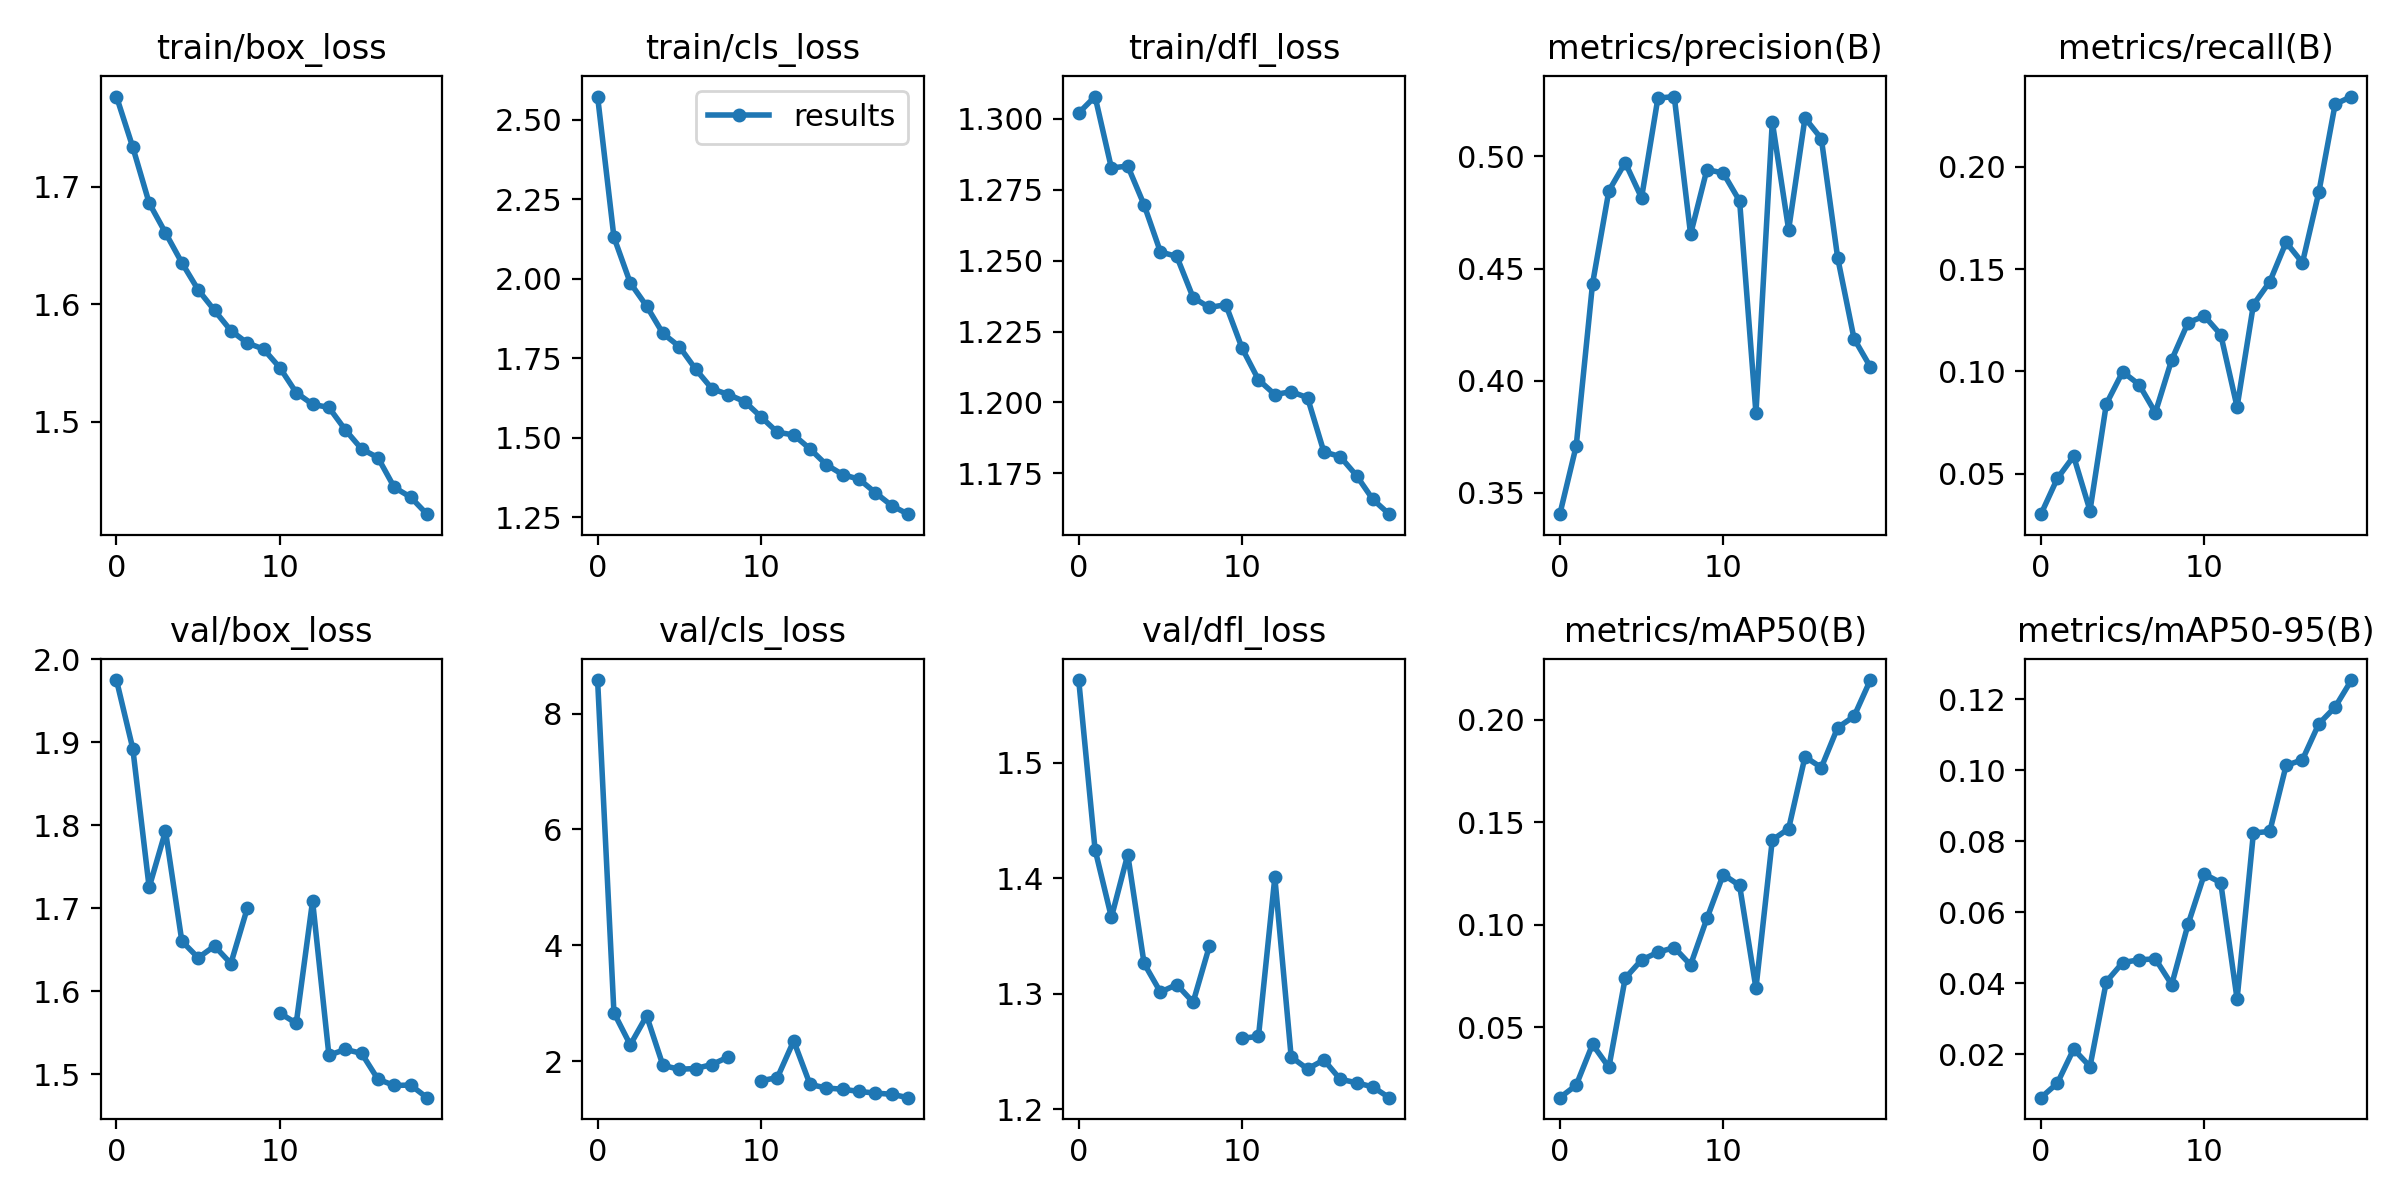

In [23]:
from IPython.display import Image
Image(filename='/kaggle/working/runs/detect/Fathomnet23-Yolov85/results.png', width=1000)

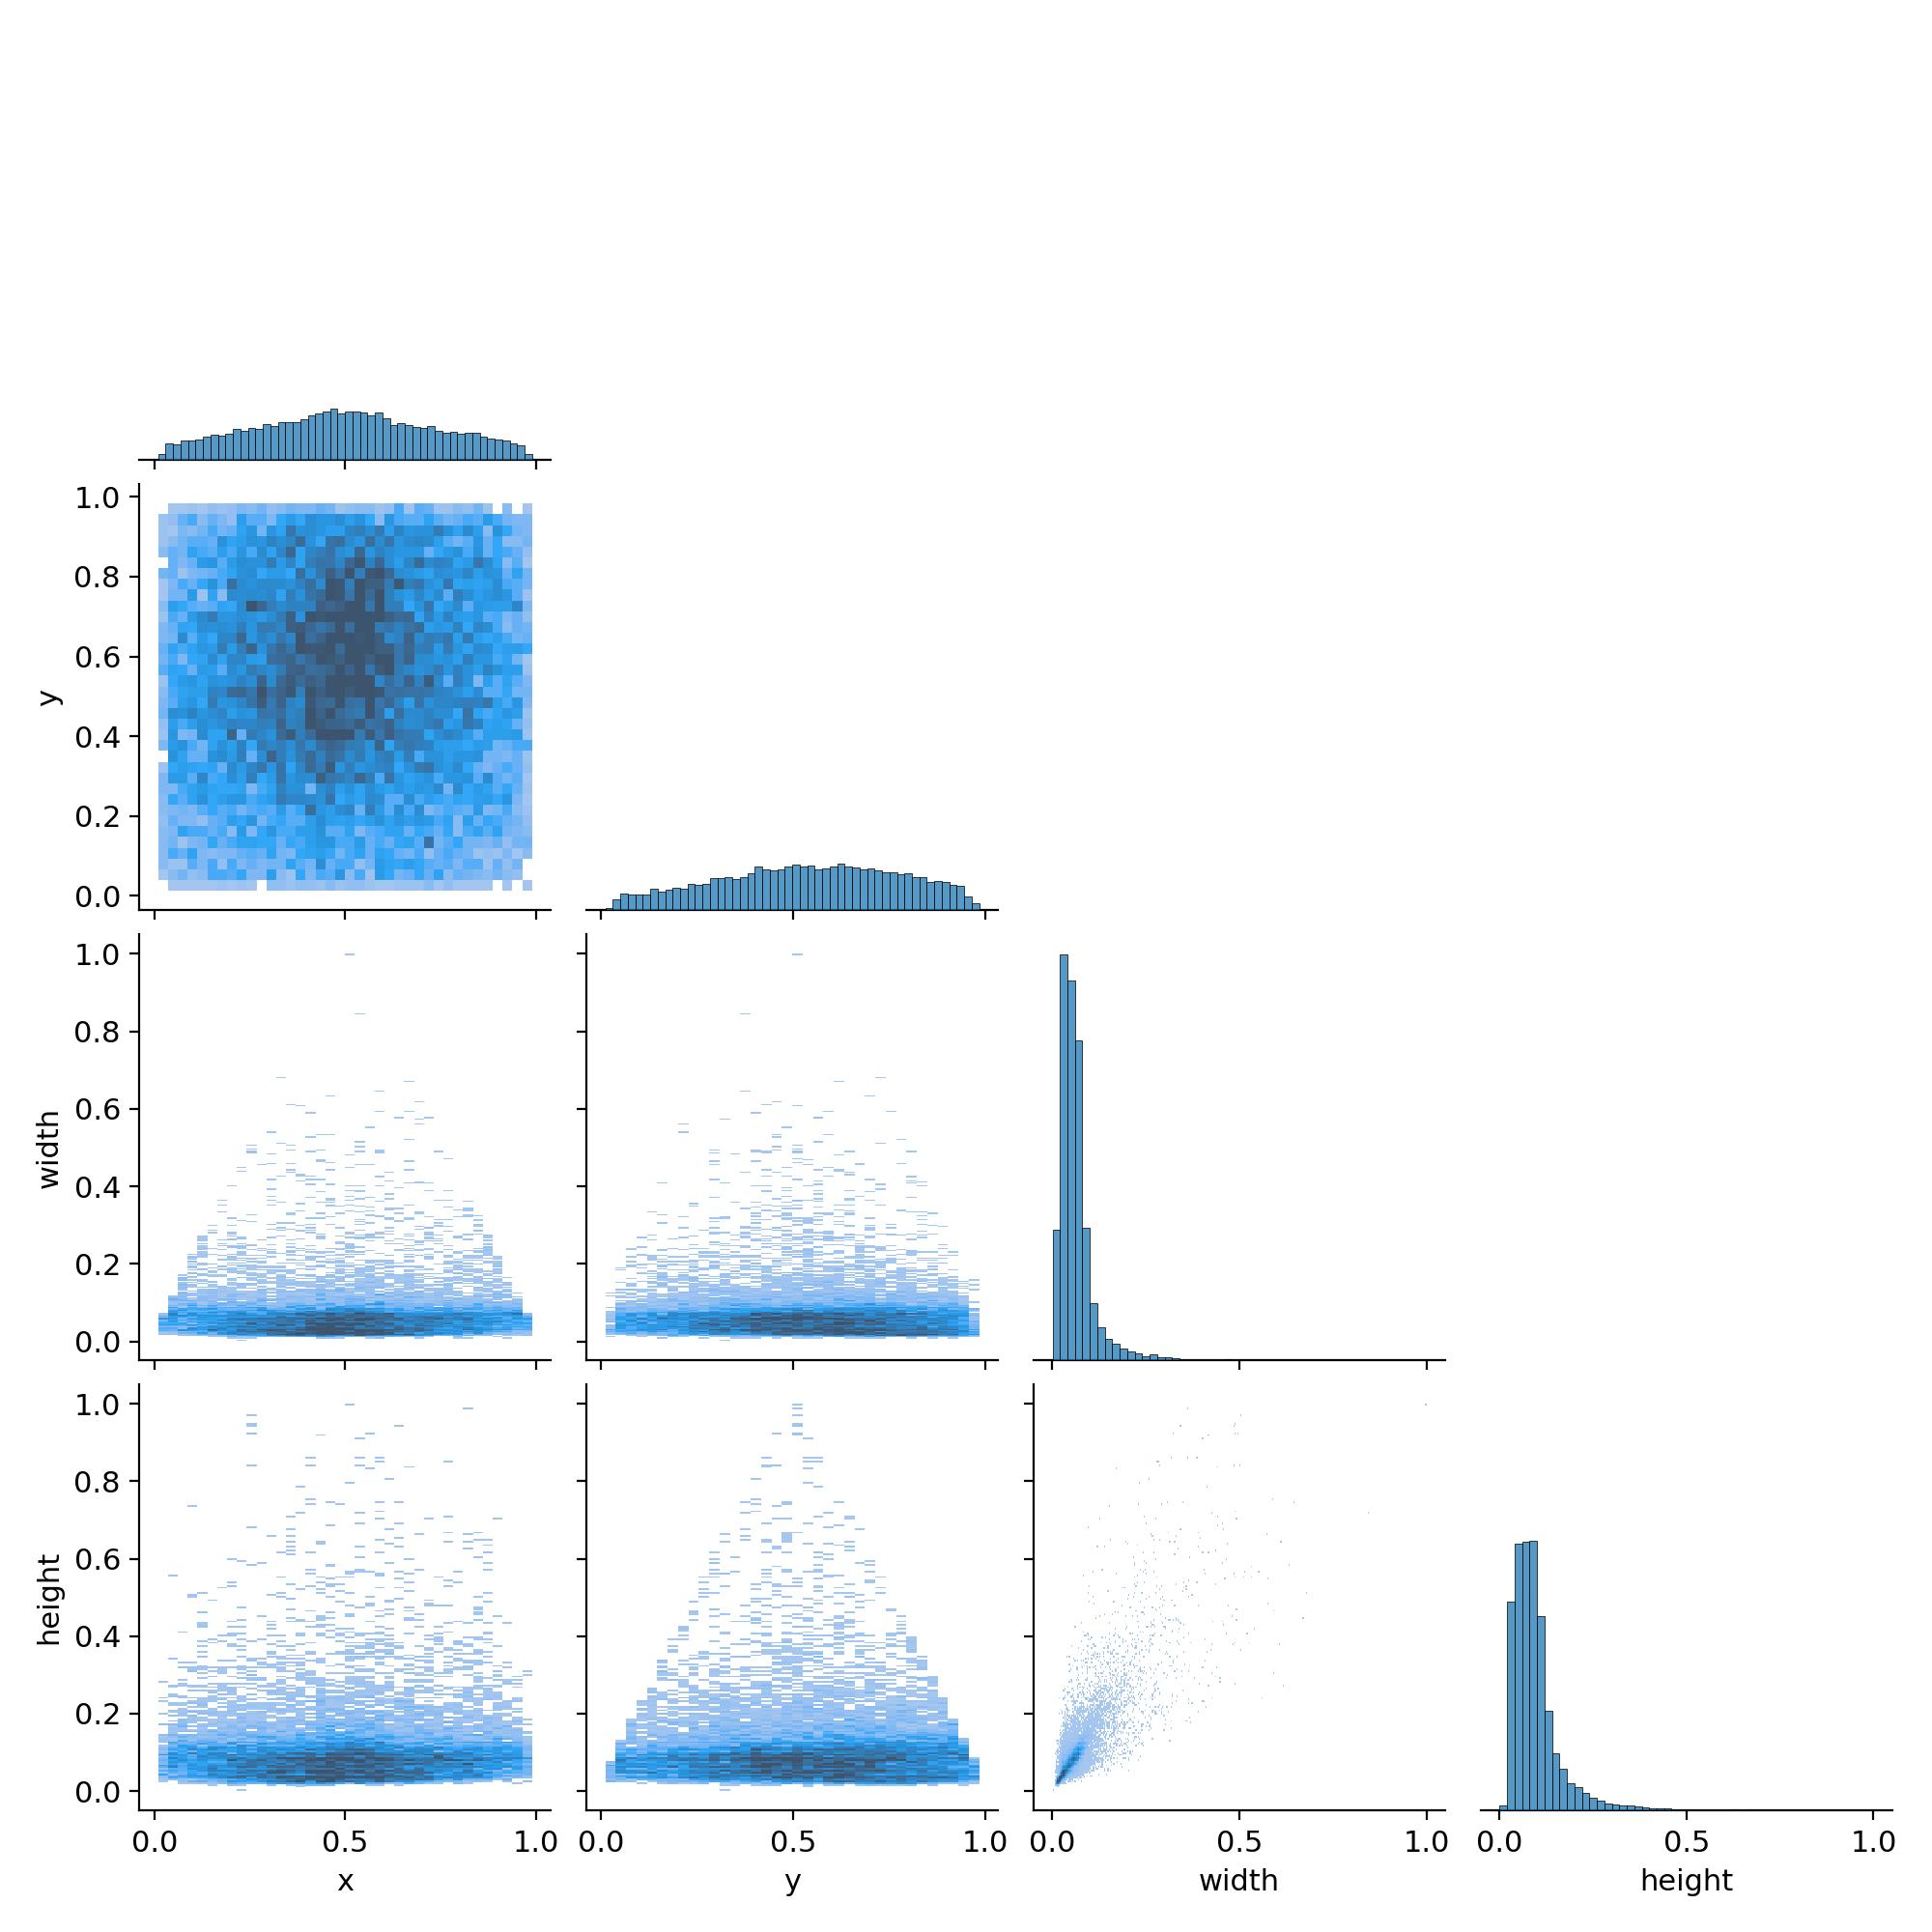

In [24]:
Image(filename='/kaggle/working/runs/detect/Fathomnet23-Yolov85/labels_correlogram.jpg', width=600)

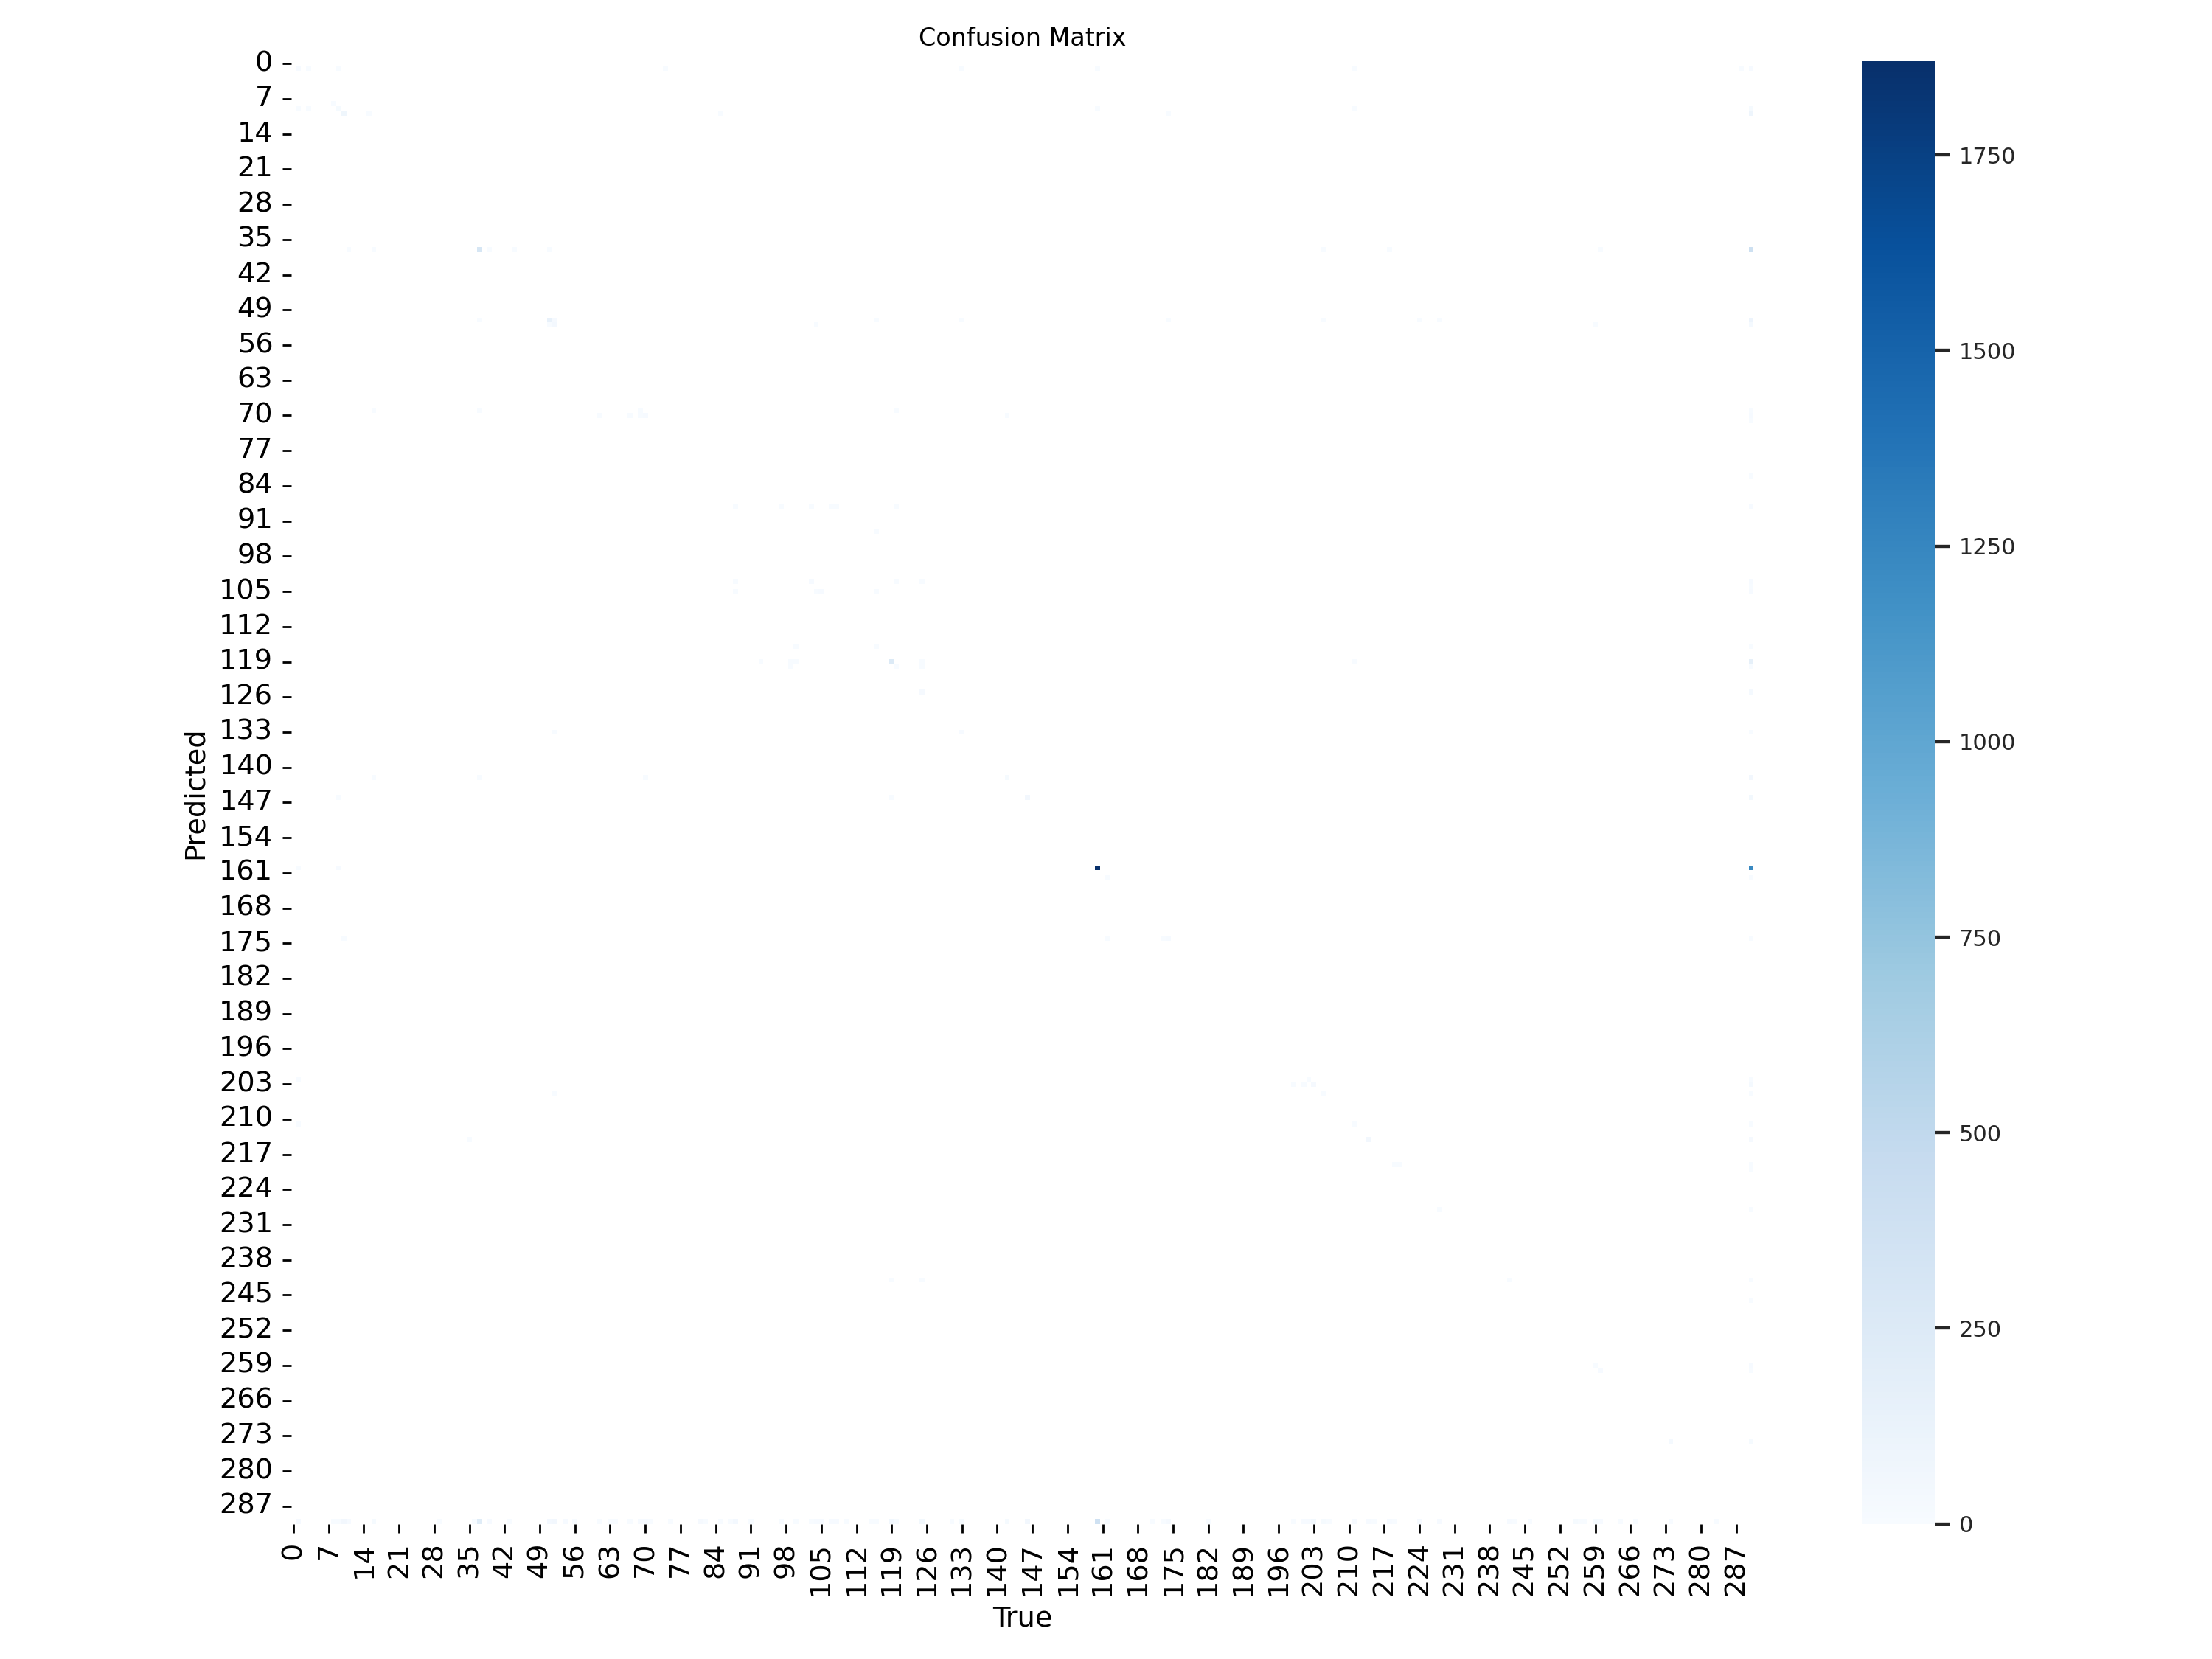

In [25]:
Image(filename='/kaggle/working/runs/detect/Fathomnet23-Yolov85/confusion_matrix.png', width=800)

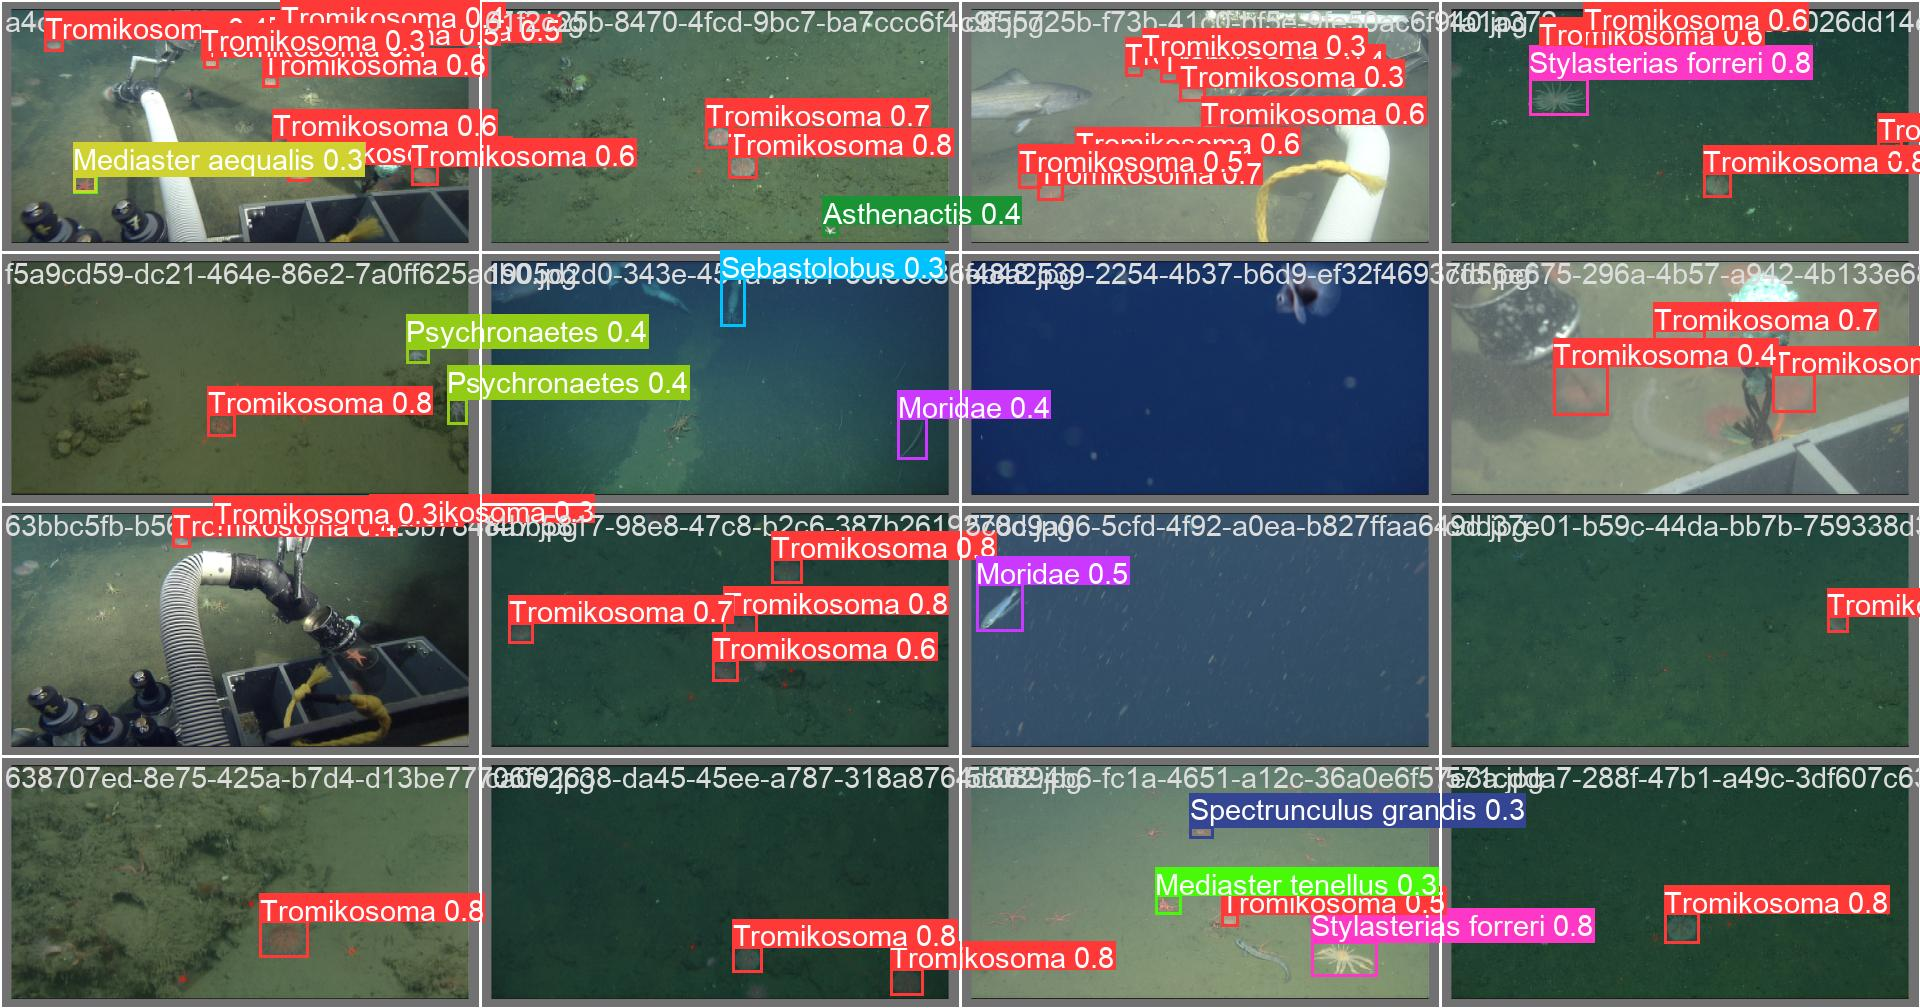

In [26]:
Image(filename='/kaggle/working/runs/detect/Fathomnet23-Yolov85/val_batch0_pred.jpg', height=800, width=1200)

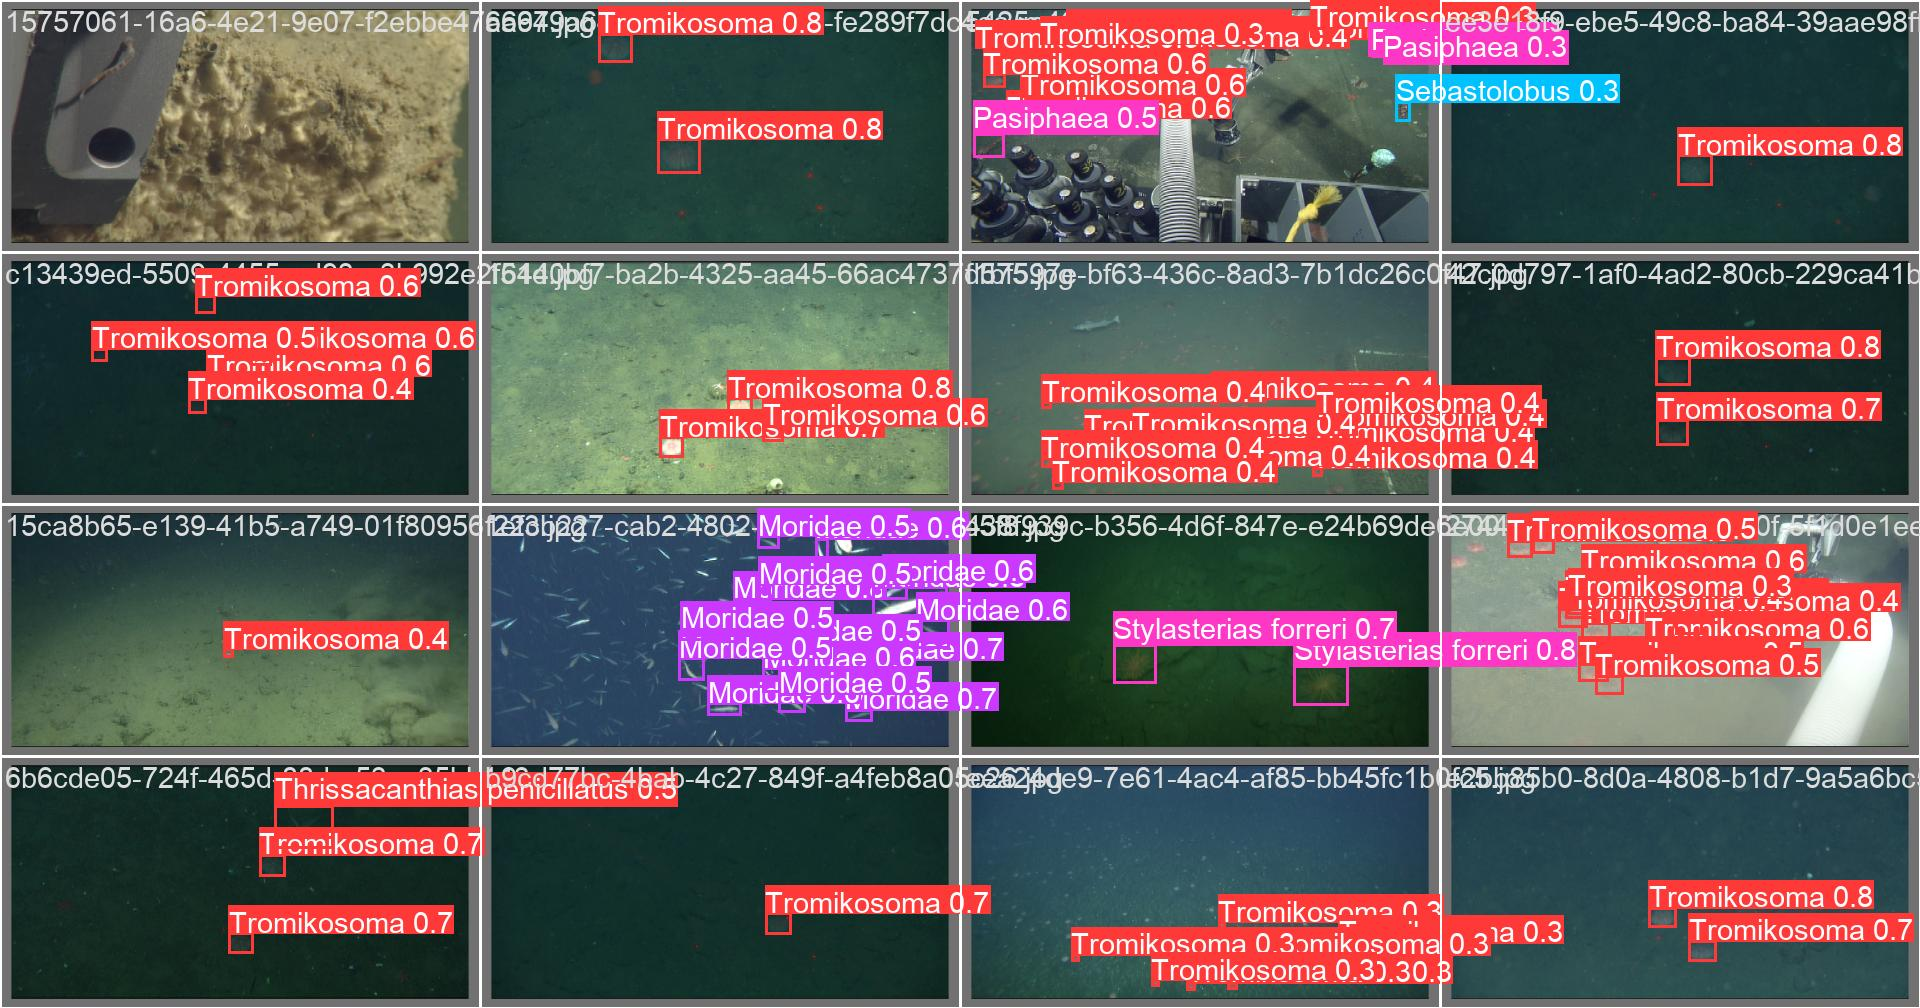

In [27]:
Image(filename='/kaggle/working/runs/detect/Fathomnet23-Yolov85/val_batch1_pred.jpg', height=800, width=1200)

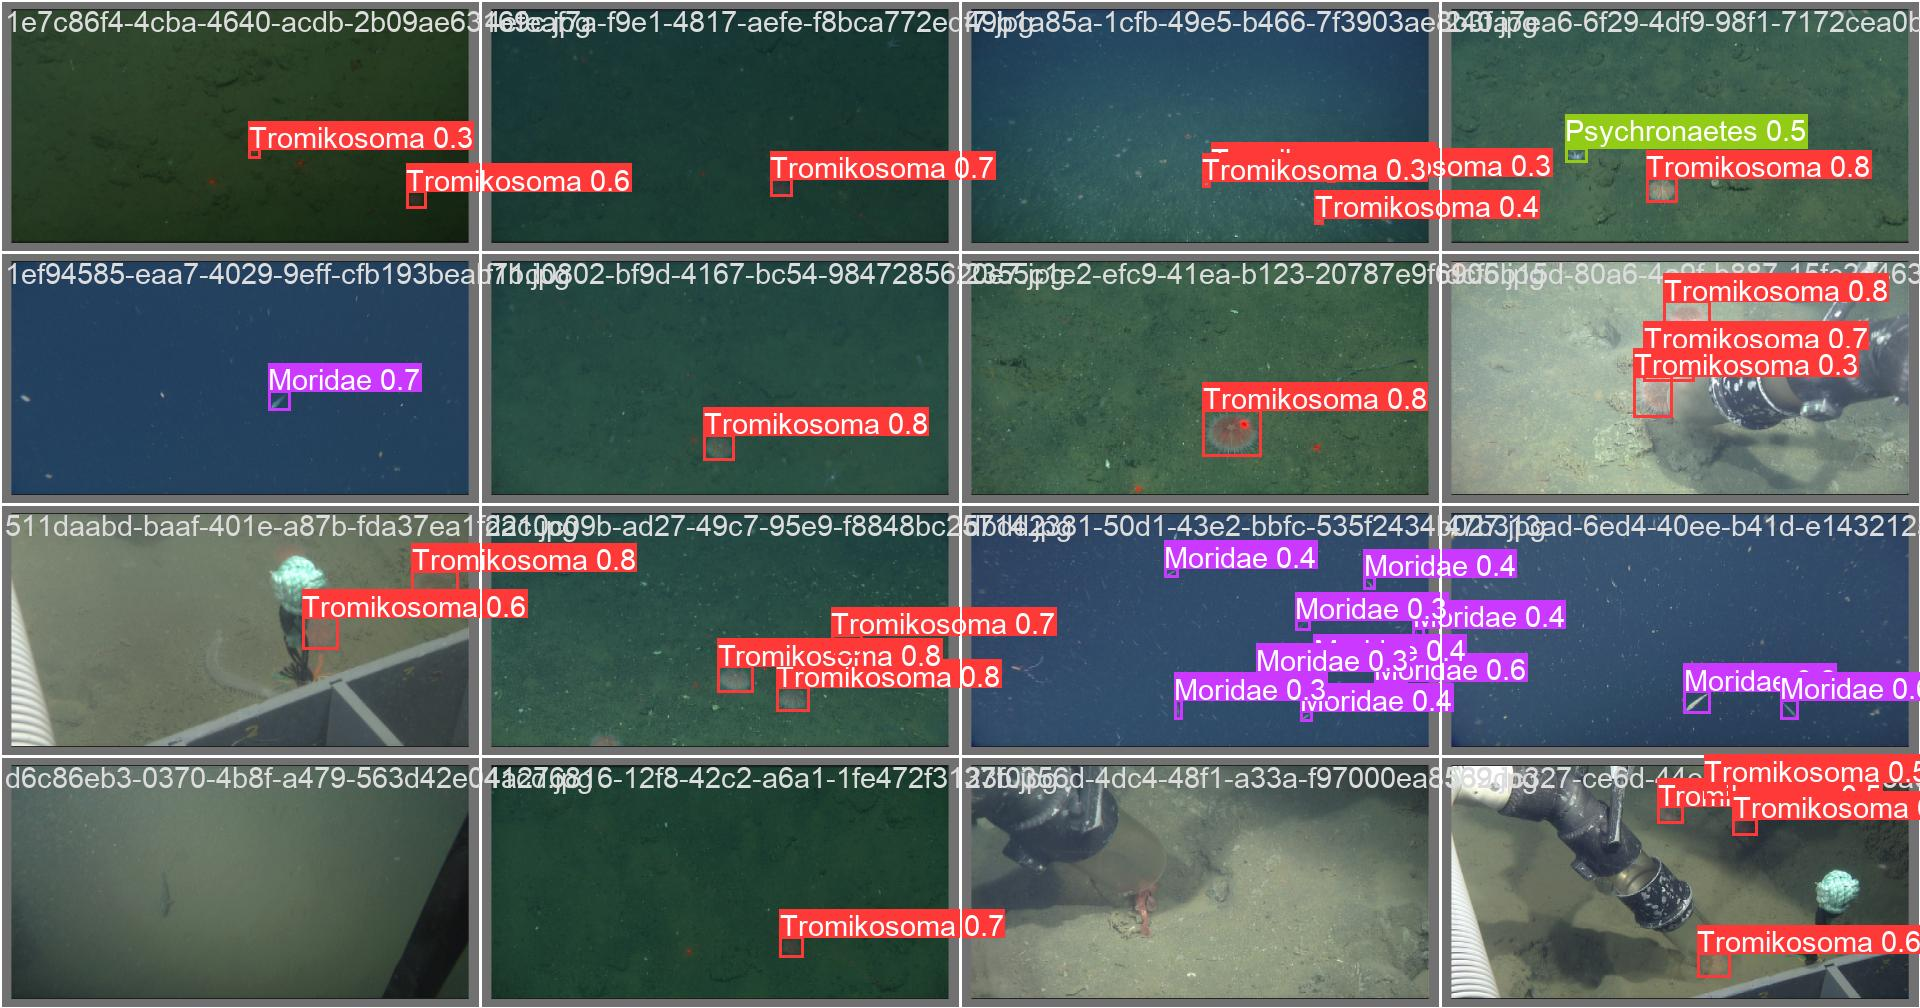

In [29]:
Image(filename='/kaggle/working/runs/detect/Fathomnet23-Yolov85/val_batch2_pred.jpg', height=800, width=1200)

In [31]:
yolo8.export(format='onnx')

Ultralytics YOLOv8.0.105 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 218 layers, 28384954 parameters, 0 gradients

PyTorch: starting from runs/detect/Fathomnet23-Yolov85/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 294, 8400) (54.5 MB)

ONNX: starting export with onnx 1.13.1 opset 17...


================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 2.8s, saved as runs/detect/Fathomnet23-Yolov85/weights/best.onnx (108.5 MB)

Export complete (3.3s)
Results saved to /kaggle/working/runs/detect/Fathomnet23-Yolov85/weights
Predict:         yolo predict task=detect model=runs/detect/Fathomnet23-Yolov85/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/Fathomnet23-Yolov85/weights/best.onnx imgsz=640 data=/kaggle/working/dataset.yaml 
Visualize:       https://netron.app


'runs/detect/Fathomnet23-Yolov85/weights/best.onnx'